# 앙상블 ensemble
- 정형 데이터에 주로 사용
- 여러 모델 또는 동일한 모델 여러 개 결합하여, 정확도 높은 모델을 만드는 학습 방법
- 핵심 원리 : 모델의 편향과 분산 줄이기
- 모델 및 샘플 결합 방식에 따른 분류
    - 보팅 voting
    - 배깅 bagging
    - 부스팅 boosting
- 기법에 따른 분류
    - 평균화 기법: 배깅, 랜덤포레스트
    - 순차적 기법: 에이다부스트, 그레디언트 부스팅

### 앙상블에 결정트리를 많이 사용하는 이유
1. 가만히 두면 성능이 최대가 됨(과대적합)
2. 여러 개의 트리를 사용해서 과대적합을 줄이는 방식으로 사용

### 보팅 voting
- 직접 투표 방식 : 여러 모델의 예측값들의 다수로 결정
- 간접 투표 방식 : 여러 모델 예측한 확률값들의 평균값으로 예측값 결정
### 배깅 bagging
- 중복 허용 샘플링하는 방식 의미하며 데이터 부족 해결
- 중복 샘플링 다른 데이터와 동일 알고리즘의 여러 모델 병렬 학습 진행
- RandomForest
### 페이스팅 pasting
- 중복 불허 샘플링하는 방식 의미하며 병렬 학습 진행
- 중복 불허 샘플링 다른 데이터와 동일 알고리즘의 여러 모델 병렬 학습
- 데이터는 많이 필요
- ExtraTrees

### RandomForest 학습 모델
------
- 100개 결정 트리 모델이 default
- 중복허용된 랜덤샘플 데이터 + 결정 트리 모델

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

In [3]:
datax,datay = load_breast_cancer(return_X_y=True, as_frame=True)
train_x, test_x, train_y, test_y = train_test_split(datax.values, datay.values,random_state=42, stratify = datay)

In [6]:
forestModel = RandomForestClassifier()
forestModel.fit(train_x, train_y)
print(forestModel.classes_)
print(forestModel.base_estimator_)


[0 1]
DecisionTreeClassifier()


In [8]:
print(forestModel.score(train_x, train_y))
print(forestModel.score(test_x, test_y))

1.0
0.958041958041958


#### oob score (out of bag)
- 중복 샘플링으로 남겨진 데이터 발생
- 해당 데이터를 검증 세트로 사용 -> oob sample

In [ ]:
forestModel = RandomForestClassifier(max_depth=5, oob_score=True)
forestModel.fit(train_x, train_y)
print(forestModel.classes_)
print(forestModel.base_estimator_)
print(forestModel.estimators_)
print(forestModel.oob_score_)

In [14]:
print(forestModel.score(train_x, train_y))
print(forestModel.score(test_x, test_y))

0.9929577464788732
0.958041958041958


In [15]:
# 특정 중요도 저장 속성 그래프 출력
forestModel.feature_importances_

array([0.04174774, 0.0183988 , 0.08426375, 0.04324287, 0.00943831,
       0.00760848, 0.02615207, 0.10540621, 0.00360939, 0.00163005,
       0.00476367, 0.00375375, 0.01442462, 0.03266764, 0.00356794,
       0.00384748, 0.0062452 , 0.00356106, 0.0028965 , 0.00513623,
       0.08387908, 0.0133494 , 0.15110044, 0.09765084, 0.01283814,
       0.01736001, 0.04117834, 0.14350212, 0.0127346 , 0.00404524])

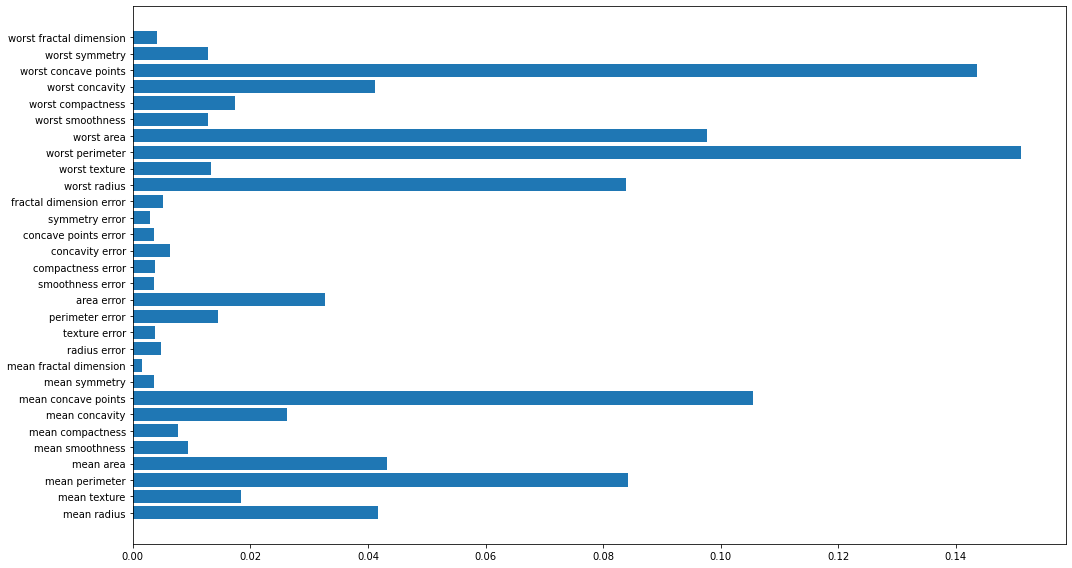

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.barh(y= datax.columns, width=forestModel.feature_importances_)
plt.tight_layout()
plt.show()

### 사용할 분류, 회귀 모두 가져오기
->  all_estimators
- type_filter 파라미터 : 'classifier', 'regressor' 지정
- 반환 : 해당 타입의 모델 리스트(모델 이름, 모델 객체)

In [31]:
from sklearn.utils import all_estimators
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
all_estimators(type_filter='classifier')

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('ClassifierChain', sklearn.multioutput.ClassifierChain),
 ('ComplementNB', sklearn.naive_bayes.ComplementNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('GaussianProcessClassifier',
  sklearn.gaussian_process._gpc.GaussianProcessClassifier),
 ('GradientBoostingClassifier',
  sklearn.ensemble._gb.GradientBoostingClassifier),
 ('HistGradientBoostingClassifier',
  sklearn.ensemble._hist_gradi

In [33]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- data , target -> numpy 타입
- target_names -> 라벨 (setosa, versicolor)
- feature_names -> 컬럼명

In [35]:
input_data = data['data']
input_target = data['target']
print(input_data.shape, input_target.shape)

(150, 4) (150,)


In [36]:
train_data, test_data, train_target, test_target = train_test_split(input_data, input_target,test_size=0.2 ,random_state=42)

### 학습 
- 학습 방법 선정 -> 분류 / 회귀
- 분류 -> kNN, LogisticRegression, DecisionTreeClassifier, 등

In [49]:
import warnings
warnings.filterwarnings('ignore')
models = all_estimators(type_filter='classifier')
scores = []
for name, model in models:
    try: 
        md =model()
        # 학습
        md.fit(train_x, train_y)
        # 평가
        result = np.round(md.score(train_x, train_y),4)
        result2 = np.round(md.score(test_x, test_y),4)
        scores.append([name, result, result2])
    except:
        pass


In [50]:
pd.DataFrame(scores)

,0,1,2
0,AdaBoostClassifier,1.0000,0.9650
1,BaggingClassifier,0.9883,0.9510
2,BernoulliNB,0.6268,0.6294
3,CalibratedClassifierCV,0.9249,0.9301
4,ComplementNB,0.8850,0.9231
5,DecisionTreeClassifier,1.0000,0.9371
6,DummyClassifier,0.6268,0.6294
7,ExtraTreeClassifier,1.0000,0.9231
8,ExtraTreesClassifier,1.0000,0.9720
9,GaussianNB,0.9460,0.9371


In [ ]:
### 학습 - 검증용 데이터셋 80:20
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

### 교차검증 k-fold Cross Validation 
- 가장 일반적으로 사용되는 교차 검증 방법
- 보통 회귀 모델에 사용, 데이터가 독립적이고 동일한 분포 가진 경우 사용
- sklearn.model_selection.KFold
- sklearn.model_selection.StratifiedFold

- 장점 : 모든 데이터셋을 평가에 활용 가능
- 단점 : 시간이 많이 소요

- cross_validate 
    - 기본 값 cv = 5-fold --> 모델 5개

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
datas = load_iris()

In [60]:
data = datas['data']
target = datas['target']

In [67]:
# 모델 객체 생성
md = KNeighborsClassifier(n_neighbors=10)
md2 = LogisticRegression()

In [71]:
# 5-fold로 5등분으로 나누어서 학습/검증 모델 생성 진행
result = cross_validate(md, data, target, return_train_score=True)
result

{'fit_time': array([0.00099754, 0.00048065, 0.00102401, 0.0008533 , 0.        ]),
 'score_time': array([0.00299096, 0.00151396, 0.00196648, 0.00298023, 0.00199294]),
 'test_score': array([0.96666667, 1.        , 1.        , 0.93333333, 1.        ]),
 'train_score': array([0.975     , 0.975     , 0.975     , 0.98333333, 0.95833333])}

In [72]:
result2 = cross_validate(md2, data, target, return_train_score=True)
result2

{'fit_time': array([0.01897478, 0.01695609, 0.01924562, 0.01698518, 0.01994991]),
 'score_time': array([0.00097275, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [75]:
print(np.mean(result['train_score']))
print(np.mean(result['test_score']))
print(np.mean(result2['train_score']))
print(np.mean(result2['test_score']))

# KNN >> Logistic

0.9733333333333333
0.9800000000000001
0.975
0.9733333333333334


In [76]:
# 히스토그램 기반 그레이디언트 부스팅 Histogram-based Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
result3 = cross_validate(hgb, data, target, return_train_score=True)
print(np.mean(result3['train_score']))
print(np.mean(result3['test_score']))

1.0
0.9466666666666667


In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
result4 = cross_validate(ada, data, target, return_train_score=True)
print(np.mean(result4['train_score']))
print(np.mean(result4['test_score']))

0.9533333333333334
0.9466666666666667
